# Project of Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline

## Loading Data

In [4]:
movies = pd.read_csv('data/peliculas.csv', encoding='utf-8')

In [5]:
type(movies)

pandas.core.frame.DataFrame

In [6]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [8]:
movies.shape

(5043, 19)

In [9]:
column_1 = movies['movie_title']
column_1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

## Inspecting the data

In [10]:
movies.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [11]:
movies.dtypes == float

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [12]:
movies.dtypes == int

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
duration.1                   False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [13]:
(movies.dtypes == float) | (movies.dtypes == int)

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [14]:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [15]:
num = (movies.dtypes == int) | (movies.dtypes == float)
num_cols = [col for col in num.index if num[col]]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [16]:
obj = (movies.dtypes == object)
obj_cols = [col for col in obj.index if obj[col]]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

## Quantitive Inspection of the data

In [17]:
movies_num = movies[num_cols]

In [18]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


<AxesSubplot:>

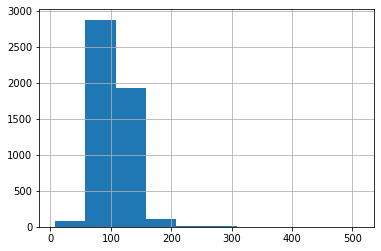

In [19]:
movies_num['duration'].hist()

<AxesSubplot:>

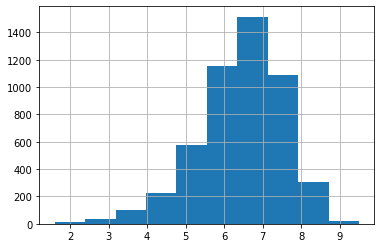

In [20]:
movies_num['imdb_score'].hist()

<AxesSubplot:>

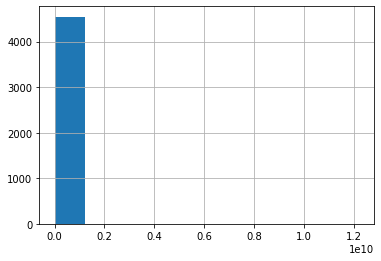

In [21]:
movies_num['budget'].hist()

In [22]:
mask_budget = (movies_num['budget'] > 1e9)
movies[mask_budget]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [23]:
the_numbers = pd.read_csv('data/the_numbers.csv')
the_numbers

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


In [24]:
the_numbers = the_numbers[['movie_title', 'production_budget', 'worldwide_gross']]
the_numbers.shape

(4341, 3)

In [25]:
movies_num = pd.concat([movies_num, movies['movie_title']], axis=1)

In [26]:
movies_num2 = pd.merge(the_numbers, movies_num, on='movie_title', how='left')
movies_num2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385 entries, 0 to 4384
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                4385 non-null   object 
 1   production_budget          4385 non-null   int64  
 2   worldwide_gross            4385 non-null   int64  
 3   title_year                 4358 non-null   float64
 4   aspect_ratio               4111 non-null   float64
 5   duration                   4372 non-null   float64
 6   duration.1                 4372 non-null   float64
 7   cast_total_facebook_likes  4385 non-null   int64  
 8   budget                     4050 non-null   float64
 9   imdb_score                 4385 non-null   float64
 10  gross                      3714 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 411.1+ KB


In [27]:
movies_num2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [28]:
(movies_num2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [29]:
available = ((movies_num2 != 0) & (movies_num2.notnull()))
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [30]:
mask = available['worldwide_gross']
mask

0        True
1        True
2        True
3        True
4        True
        ...  
4380     True
4381    False
4382     True
4383    False
4384     True
Name: worldwide_gross, Length: 4385, dtype: bool

In [31]:
movies_num2 = movies_num2[mask]
movies

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Color,NaN,87.0,English,Canada,87.0,Comedy|Drama,NaN,fraud|postal worker|prison|theft|trial,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,2283,NaN,7.7,NaN
5039,The Following,NaN,Color,16.00,43.0,English,USA,43.0,Crime|Drama|Mystery|Thriller,TV-14,cult|fbi|hideout|prison escape|serial killer,NaN,Natalie Zea,Valorie Curry,Sam Underwood,1753,NaN,7.5,NaN
5040,A Plague So Pleasant,2013.0,Color,NaN,76.0,English,USA,76.0,Drama|Horror|Thriller,NaN,NaN,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,0,1400.0,6.3,NaN
5041,Shanghai Calling,2012.0,Color,2.35,100.0,English,USA,100.0,Comedy|Drama|Romance,PG-13,NaN,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,2386,NaN,6.3,10443.0


## Missing Data

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [34]:
movies_num2 = movies_num2.drop(['movie_title', 'duration.1', 'gross'], axis=1)

In [35]:
values = imputer.fit_transform(movies_num2)
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        1.43000000e+02, 4.04553863e+07, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03, 4.04553863e+07, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [36]:
x = pd.DataFrame(values, columns=movies_num2.columns, index = movies_num2.index)
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [37]:
x.to_csv('data/x.csv', index=False)

In [41]:
movies[obj_cols].to_csv('data/obj_cols.csv', index=False)